# Linear Regression

## Notation

- $x$ - Input features.
- $x_j$ - The $j^{th}$ feature.
- $\vec{x^{(i)}}$ - Features of the $i^{th}$ training example; the $i^{th}$ row.
- $x_j^{(i)}$ - The $i^{th}$ element for the $j^{th}$ feature.
- $y$ - Output/target variable.
- $y^{(i)}$ - The $i^{th}$ output value.
- $m$ - Number of training examples.
- $n$ - Number of training features.
- $\vec{w}, b$ - Model parameters.
- $\alpha$ - Learning rate.

## Formulas

### Model Prediction

$f_{\vec{w}, b}(\vec{x}) = \vec{w} \cdot \vec{x} + b$

### Cost Function

$J(\vec{w}, b) = \frac{1}{2m} \sum_{i = 1}^{m} (f_{\vec{w}, b}(x) - y^{(i)})^2$

### Gradient Descent

Repeat the until convergence:

$w_j = w_j - \alpha \frac{\partial}{\partial w_j} J(\vec{w}, b)$\
$b = b - \alpha \frac{\partial}{\partial b} J(\vec{w}, b)$

Repeat the until convergence:

$w_j =  w_j - \alpha [\frac{1}{m} \sum_{i = 1}^{m}(f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)})x_j^{(i)}]$\
$b = b - \alpha [\frac{1}{m} \sum_{i = 1}^{m}(f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)})]$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

## Linear Regression Implementation

In [2]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Apply gradient descent.
        for i in range(self.n_iters):
            y_predict = np.dot(X, self.weights) + self.bias

            dw = (1 / num_samples) * np.dot(X.T, (y_predict - y))
            db = (1 / num_samples) * np.sum(y_predict - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [ ]:
def mean_squared_error(y_true, y_predicted):
    return np.mean((y_true - y_predicted) ** 2)

## Generate Random Dataset

,Feature 1,Feature 2,Feature 3,Target
0,-0.792521,0.504987,-0.114736,13.510026
1,0.280992,-0.208122,-0.622700,-18.777475
2,0.791032,1.402794,-0.909387,111.265809
3,0.625667,-1.070892,-0.857158,-77.989347
4,-0.342715,-0.161286,-0.802277,-35.951738
...,...,...,...,...
95,0.651391,0.758969,-0.315269,69.565698
96,1.586017,2.133033,-1.237815,183.027671
97,0.010233,0.462103,-0.981509,17.553383
98,-0.234587,-0.420645,-1.415371,-63.284318


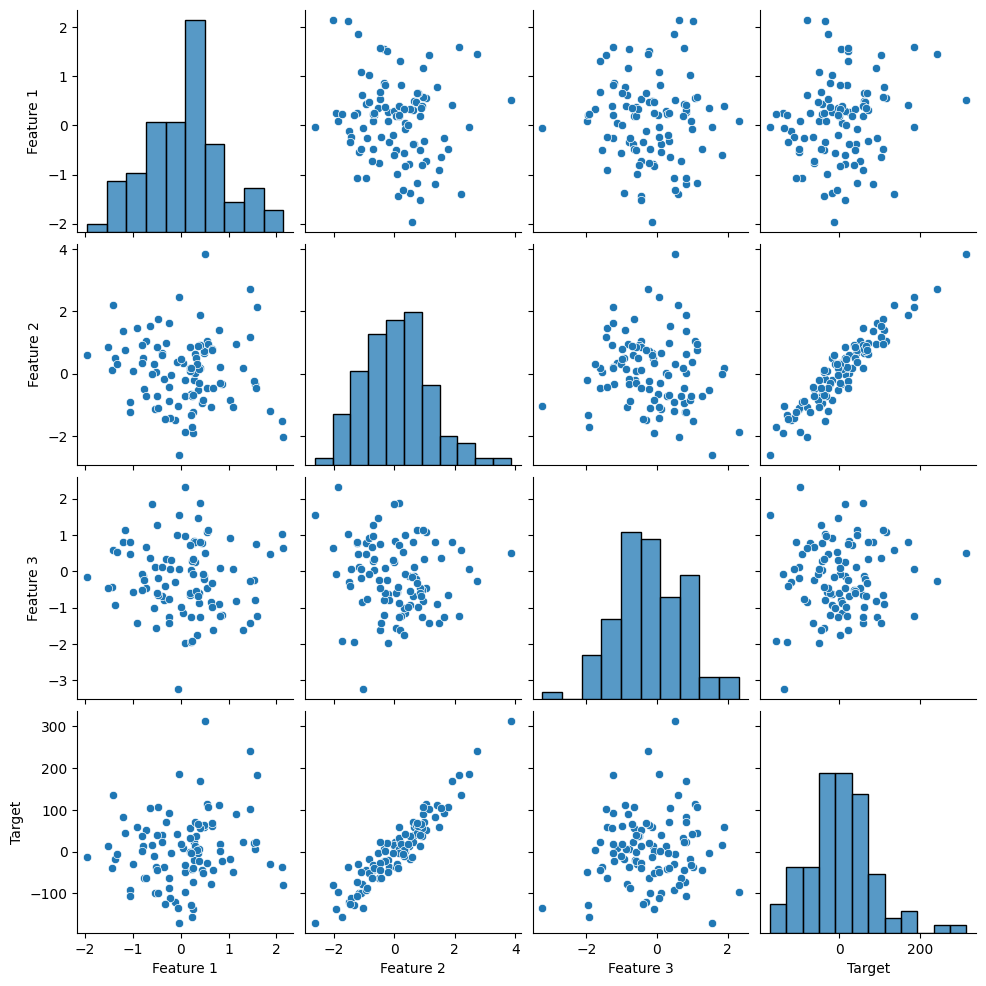

In [9]:
X, y = datasets.make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

data = pd.DataFrame(X, columns=["Feature 1", "Feature 2", "Feature 3"])
data["Target"] = y
display(data)

sns.pairplot(data)
plt.show()

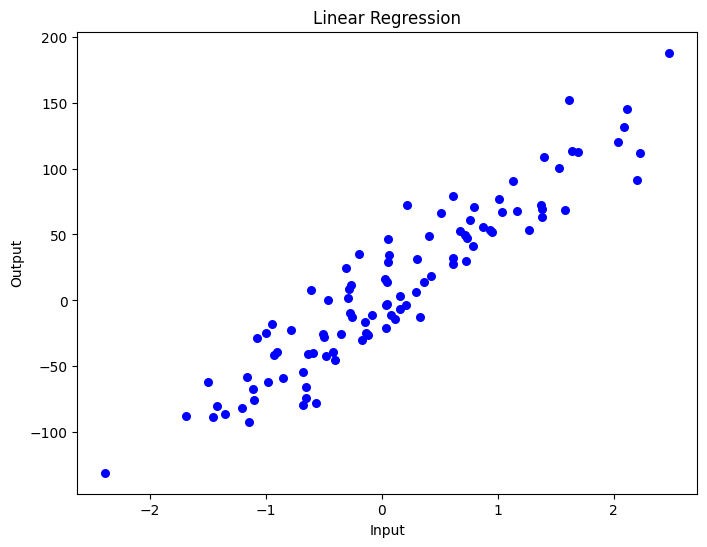

In [4]:
X, y = datasets.make_regression(n_samples=100, n_features=2, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)
plt.title("Linear Regression")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Train Model

In [5]:
regressor = LinearRegression(lr=0.01)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
mse_value = mean_squared_error(y_test, predicted)
print(f"The mean squared error is: {mse_value}")

The mean squared error is: 588.7118301378961


## Visualize Results

ValueError: x and y must be the same size

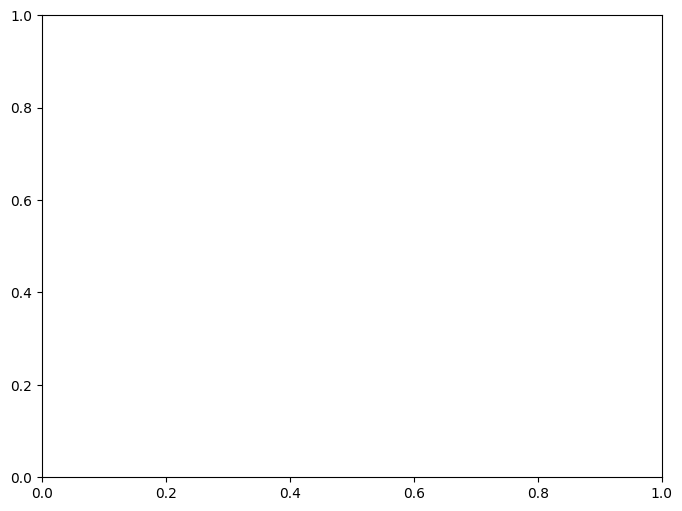

In [6]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), label="Train")
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), label="Test")
plt.title("Linear Regression Results")
plt.legend()
plt.plot(X, y_pred_line, color="black", label="Prediction")
plt.show()

## Train Model with Scikit-Learn

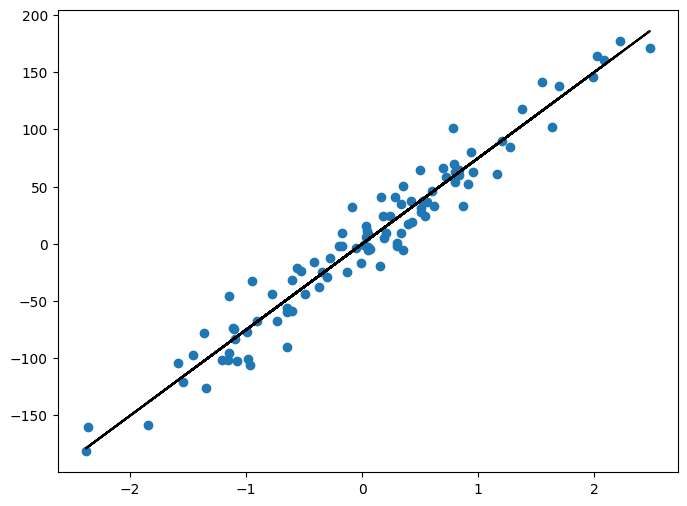

In [ ]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)
prediction = regressor.predict(X)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(X, prediction, color="black")
plt.show()